In [408]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [409]:
INPUT_FOLDER = "preproc"
OUTPUT_FOLDER = "enrich"

In [464]:
os.makedirs("data/enrich", exist_ok=True)

In [411]:
os.listdir('data/preproc/')

['us-shareprices-daily.csv', 'us_shareprices_daily.csv', 'us_companies.csv']

In [412]:
key = "us_companies"
df_us_companies = pd.read_csv(f"data/{INPUT_FOLDER}/{key}.csv")
df_us_companies.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SimFinId                       5020 non-null   int64  
 1   Company Name                   5020 non-null   object 
 2   IndustryId                     5020 non-null   float64
 3   ISIN                           5020 non-null   object 
 4   End of financial year (month)  5020 non-null   float64
 5   Number Employees               5020 non-null   float64
 6   Business Summary               5020 non-null   object 
 7   Market                         5020 non-null   object 
 8   CIK                            5020 non-null   float64
 9   Main Currency                  5020 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 392.3+ KB


In [413]:
df_us_companies.head()

,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,45846,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD
1,1333027,Li Auto Inc.,0.0,0,12.0,0.0,Unknown,us,1791706.0,USD
2,367153,Alcoa Corp,110004.0,US0138721065,12.0,12900.0,Alcoa Corp is an integrated aluminum company. ...,us,1675149.0,USD
3,7962652,Ares Acquisition Corporation,104002.0,US0003071083,12.0,0.0,Ares Acquisition Corporation does not have sig...,us,1829432.0,USD
4,11820349,Armada Acquisition Corp. I,104002.0,US04208V1035,9.0,0.0,Armada Acquisition Corp. I focuses on effectin...,us,1844817.0,USD


In [414]:
key = "us-shareprices-daily"
df_us_share_price = pd.read_csv(f"data/{INPUT_FOLDER}/{key}.csv", parse_dates=["Date"])
df_us_share_price.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815913 entries, 0 to 5815912
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Ticker              5815913 non-null  object        
 1   SimFinId            5815913 non-null  int64         
 2   Date                5815913 non-null  datetime64[ns]
 3   Open                5815913 non-null  float64       
 4   High                5815913 non-null  float64       
 5   Low                 5815913 non-null  float64       
 6   Close               5815913 non-null  float64       
 7   Adj. Close          5815913 non-null  float64       
 8   Volume              5815913 non-null  int64         
 9   Dividend            5815913 non-null  float64       
 10  Shares Outstanding  5815913 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 488.1+ MB


In [415]:
df_us_companies.head()

,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,45846,AGILENT TECHNOLOGIES INC,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD
1,1333027,Li Auto Inc.,0.0,0,12.0,0.0,Unknown,us,1791706.0,USD
2,367153,Alcoa Corp,110004.0,US0138721065,12.0,12900.0,Alcoa Corp is an integrated aluminum company. ...,us,1675149.0,USD
3,7962652,Ares Acquisition Corporation,104002.0,US0003071083,12.0,0.0,Ares Acquisition Corporation does not have sig...,us,1829432.0,USD
4,11820349,Armada Acquisition Corp. I,104002.0,US04208V1035,9.0,0.0,Armada Acquisition Corp. I focuses on effectin...,us,1844817.0,USD


In [416]:
df_us_share_price.head()

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,2019-04-12,81.43,82.06,80.90,80.98,77.77,1249295,0.0,317515869.0
1,A,45846,2019-04-15,81.00,81.13,79.91,80.40,77.22,1627268,0.0,317515869.0
2,A,45846,2019-04-16,80.82,80.96,77.19,77.55,74.48,3441597,0.0,317515869.0
3,A,45846,2019-04-17,78.15,78.32,74.46,75.43,72.44,4471971,0.0,317515869.0
4,A,45846,2019-04-18,75.73,76.54,75.31,76.17,73.16,2874195,0.0,317515869.0


In [417]:
#check datatypes of share price data
df_us_share_price.dtypes

Ticker                        object
SimFinId                       int64
Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj. Close                   float64
Volume                         int64
Dividend                     float64
Shares Outstanding           float64
dtype: object

Joining Data

In [418]:
#join df_us_share_price with df_us_companies on SimFinId
df = pd.merge(df_us_share_price, df_us_companies, on="SimFinId", how="left")

Create the Target

In [419]:
#the target is the next close price, by company and date
df['target1'] = df.groupby('SimFinId')['Close'].shift(-1)

EDA, To see what should we erase

In [420]:
#Max Shareprice date per stock

max_day_per_stock = df.groupby('SimFinId')['Date'].max().reset_index()

max_day_per_stock.describe()

,SimFinId,Date
count,5.586000e+03,5586
mean,6.275479e+06,2023-12-14 09:39:14.887217920
min,1.800000e+01,2019-04-23 00:00:00
25%,6.592065e+05,2024-03-15 00:00:00
50%,1.870196e+06,2024-03-15 00:00:00
75%,1.179525e+07,2024-03-15 00:00:00
max,1.848257e+07,2024-03-15 00:00:00
std,6.175519e+06,NaN


In [421]:
#stopcks_that_matter = 
stopcks_that_matter = max_day_per_stock[max_day_per_stock['Date'] > '2024-01-01']
stopcks_that_matter = stopcks_that_matter['SimFinId']

In [422]:
#erasing stocks that dont register prices after 2024
df = df[df['SimFinId'].isin(stopcks_that_matter)]

In [423]:
#if the target 1 > close, target 2 = 1, else 0
df['target2'] = (df['target1'] > df['Close']).astype(int)

df.head()

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,...,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency,target1,target2
0,A,45846,2019-04-12,81.43,82.06,80.90,80.98,77.77,1249295,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,80.40,0
1,A,45846,2019-04-15,81.00,81.13,79.91,80.40,77.22,1627268,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,77.55,0
2,A,45846,2019-04-16,80.82,80.96,77.19,77.55,74.48,3441597,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,75.43,0
3,A,45846,2019-04-17,78.15,78.32,74.46,75.43,72.44,4471971,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,76.17,1
4,A,45846,2019-04-18,75.73,76.54,75.31,76.17,73.16,2874195,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,75.57,0


In [424]:
#Checking Formula is good
df[df['SimFinId'] == 59265].sort_values('Date',ascending=False)

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,...,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency,target1,target2
3457143,MSFT,59265,2024-03-15,419.29,422.60,412.79,416.42,413.29,45079903,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,NaN,0
3457142,MSFT,59265,2024-03-14,420.24,427.82,417.99,425.22,422.02,33955263,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,416.42,0
3457141,MSFT,59265,2024-03-13,418.10,418.18,411.45,415.10,411.98,16990048,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,425.22,1
3457140,MSFT,59265,2024-03-12,407.62,415.57,406.79,415.28,412.16,21563656,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,415.10,0
3457139,MSFT,59265,2024-03-11,403.76,405.68,401.26,404.52,401.48,15998511,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,415.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455908,MSFT,59265,2019-04-18,122.19,123.52,121.30,123.37,116.53,27990998,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,123.76,1
3455907,MSFT,59265,2019-04-17,121.24,121.85,120.54,121.77,115.02,19300938,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,123.37,1
3455906,MSFT,59265,2019-04-16,121.64,121.65,120.10,120.77,114.08,14071787,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,121.77,1
3455905,MSFT,59265,2019-04-15,120.94,121.58,120.57,121.05,114.34,15792572,0.0,...,101003.0,US5949181045,6.0,166475.0,Microsoft Corp is a technology company. It dev...,us,789019.0,USD,120.77,0


In [425]:
#Rows where target1 is NaN save them in a df called tomorrow
tomorrow = df[df['target1'].isna()]
tomorrow.head()

#delete rows where target1 is NaN
df = df.dropna(subset=['target1'])

In [426]:
data = df[['SimFinId', 'Date', 'Open', 'Low', 'High', 'Close', 'Adj. Close', 'Volume', 'target2']]

data = data.set_index(['SimFinId', 'Date'])
data.head()

Open    Low   High  Close  Adj. Close   Volume  target2
SimFinId Date                                                                
45846    2019-04-12  81.43  80.90  82.06  80.98       77.77  1249295        0
         2019-04-15  81.00  79.91  81.13  80.40       77.22  1627268        0
         2019-04-16  80.82  77.19  80.96  77.55       74.48  3441597        0
         2019-04-17  78.15  74.46  78.32  75.43       72.44  4471971        1
         2019-04-18  75.73  75.31  76.54  76.17       73.16  2874195        0

In [427]:
data.dtypes

Open          float64
Low           float64
High          float64
Close         float64
Adj. Close    float64
Volume          int64
target2         int64
dtype: object

XG Boost for Target 2 (If price will rise tomorrow)

In [428]:
"""from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score

# Ensure 'target2' is present in the data
if 'target2' not in data.columns:
    raise KeyError("Column 'target2' not found in the DataFrame")

# Assuming 'data' is your DataFrame and 'target' is the column you want to predict
# Prepare the data
X = data.drop(columns=['target2'])
y = data['target2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

# Define threshold
threshold = 0.5

# Calculate accuracy
train_accuracy = accuracy_score(y_train, (y_train_pred > threshold).astype(int))
test_accuracy = accuracy_score(y_test, (y_test_pred > threshold).astype(int))
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")"""

'from sklearn.model_selection import train_test_split\nimport xgboost as xgb\nfrom sklearn.metrics import mean_squared_error, accuracy_score\n\n# Ensure \'target2\' is present in the data\nif \'target2\' not in data.columns:\n    raise KeyError("Column \'target2\' not found in the DataFrame")\n\n# Assuming \'data\' is your DataFrame and \'target\' is the column you want to predict\n# Prepare the data\nX = data.drop(columns=[\'target2\'])\ny = data[\'target2\']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train an XGBoost model\nmodel = xgb.XGBRegressor(objective=\'reg:squarederror\', n_estimators=100, learning_rate=0.1, max_depth=5)\nmodel.fit(X_train, y_train)\n\n# Make predictions\ny_train_pred = model.predict(X_train)\ny_test_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_test_pred)\nprint(f"Mean Squared Error: {mse}")\n\n# Define threshold\

In [429]:
"""#show me the prediction of data
data['prediction'] = model.predict(X)"""

"#show me the prediction of data\ndata['prediction'] = model.predict(X)"

In [430]:
#data.sample(10)

In [431]:
"""#threshold
threshold = 0.5
data['prediction_with_threshold'] = (data['prediction'] > threshold).astype(int)"""

"#threshold\nthreshold = 0.5\ndata['prediction_with_threshold'] = (data['prediction'] > threshold).astype(int)"

In [432]:
#data

TEST 2 (Just 1 Stock and 60 days)

In [433]:
data = df[['SimFinId', 'Date', 'Close']]

data = data.set_index(['SimFinId', 'Date'])
data.head()

Close
SimFinId Date             
45846    2019-04-12  80.98
         2019-04-15  80.40
         2019-04-16  77.55
         2019-04-17  75.43
         2019-04-18  76.17

In [434]:
#data['log_return']  = data.groupby('SimFinId')['Close'].pct_change().add(1).apply(np.log)
#data.head()

In [435]:
#Finding the SimFinId of ticker A
df[df['Ticker']=='A'].sort_values('Date',ascending=False).head(1)

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,...,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency,target1,target2
1238,A,45846,2024-03-14,147.9,148.25,144.29,145.21,144.2,2096980,0.0,...,106001.0,US00846U1016,10.0,16400.0,Agilent Technologies Inc is engaged in life sc...,us,1090872.0,USD,147.48,1


In [436]:
"""import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def train_xgboost_model(data, simfin_id, last_date):
    # Filter the DataFrame to get the last 60 days of data
    sixty_days_prior = last_date - pd.DateOffset(days=60)
    data = data[(data.index.get_level_values('Date') > sixty_days_prior) & (data.index.get_level_values('Date') <= last_date)]

    #rename close to target
    data = data.rename(columns={'Close': 'target'})
    # Filter the DataFrame based on the provided SimFinId
    
    data_filtered = data[data.index.get_level_values('SimFinId') == simfin_id]
    
    # Extract useful features from the Date column
    data_filtered['year'] = data_filtered.index.get_level_values('Date').year
    data_filtered['month'] = data_filtered.index.get_level_values('Date').month
    data_filtered['day'] = data_filtered.index.get_level_values('Date').day
    data_filtered['dayofweek'] = data_filtered.index.get_level_values('Date').dayofweek

    # Prepare the data
    X = data_filtered.drop(columns=['target'])
    y = data_filtered['target']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train an XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return model, train_mse, test_mse

# Example usage
# Assuming 'data' is your DataFrame and 'SimFinId' is part of the index
#simfin_id = 59265
#date_for_model = pd.to_datetime('2024-03-04')  # Convert string to datetime
#model, train_mse, test_mse = train_xgboost_model(data, simfin_id, date_for_model)
#print(f"Train Mean Squared Error: {train_mse}")
#print(f"Test Mean Squared Error: {test_mse}")"""

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nimport xgboost as xgb\nfrom sklearn.metrics import mean_squared_error\n\ndef train_xgboost_model(data, simfin_id, last_date):\n    # Filter the DataFrame to get the last 60 days of data\n    sixty_days_prior = last_date - pd.DateOffset(days=60)\n    data = data[(data.index.get_level_values(\'Date\') > sixty_days_prior) & (data.index.get_level_values(\'Date\') <= last_date)]\n\n    #rename close to target\n    data = data.rename(columns={\'Close\': \'target\'})\n    # Filter the DataFrame based on the provided SimFinId\n    \n    data_filtered = data[data.index.get_level_values(\'SimFinId\') == simfin_id]\n    \n    # Extract useful features from the Date column\n    data_filtered[\'year\'] = data_filtered.index.get_level_values(\'Date\').year\n    data_filtered[\'month\'] = data_filtered.index.get_level_values(\'Date\').month\n    data_filtered[\'day\'] = data_filtered.index.get_level_values(\'Date\').day\n    

In [437]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def train_xgboost_model(data, simfin_id, last_date):
    # Filter the DataFrame to get the last 60 days of data
    last_date = pd.to_datetime(last_date)
    sixty_days_prior = last_date - pd.DateOffset(days=60)
    data = data[(data.index.get_level_values('Date') > sixty_days_prior) & (data.index.get_level_values('Date') <= last_date)]

    # Rename close to target
    data = data.rename(columns={'Close': 'target'})
    # Filter the DataFrame based on the provided SimFinId
    data_filtered = data[data.index.get_level_values('SimFinId') == simfin_id]
    
    # Extract useful features from the Date column
    data_filtered['year'] = data_filtered.index.get_level_values('Date').year
    data_filtered['month'] = data_filtered.index.get_level_values('Date').month
    data_filtered['day'] = data_filtered.index.get_level_values('Date').day
    data_filtered['dayofweek'] = data_filtered.index.get_level_values('Date').dayofweek
    data_filtered['lag1'] = data_filtered['target'].shift(1)

    # Prepare the data
    X = data_filtered.drop(columns=['target'])
    y = data_filtered['target']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train an XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Predict the next 15 days
    future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15, freq='B')  # Business days
    future_data = pd.DataFrame(index=pd.MultiIndex.from_product([[simfin_id], future_dates], names=['SimFinId', 'Date']))
    future_data['year'] = future_data.index.get_level_values('Date').year
    future_data['month'] = future_data.index.get_level_values('Date').month
    future_data['day'] = future_data.index.get_level_values('Date').day
    future_data['dayofweek'] = future_data.index.get_level_values('Date').dayofweek
    future_data['lag1'] = data_filtered['target'].iloc[-1]
    
    future_predictions = model.predict(future_data)
    future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions})
    
    return future_predictions_df

# Example usage
# Assuming 'data' is your DataFrame and 'SimFinId' is part of the index
# simfin_id = 59265
# date_for_model = pd.to_datetime('2024-03-04')  # Convert string to datetime
# model, train_mse, test_mse, future_predictions = train_xgboost_model(data, simfin_id, date_for_model)
# print(f"Train Mean Squared Error: {train_mse}")
# print(f"Test Mean Squared Error: {test_mse}")
# print(f"Future Predictions: {future_predictions}")

In [438]:
prediction_df = train_xgboost_model(data, 59265, '2024-03-04')
prediction_df

/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_80306/462105060.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered.index.get_level_values('Date').year
/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_80306/462105060.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered.index.get_level_values('Date').month
/var/folders/0z/4yrpt4m15ps8kzs2ljkgk40r0000gn/T/ipykernel_80306/462105060.py:20: SettingWithCopyWarning: 

,Date,Predicted_Close
0,2024-03-05,418.226715
1,2024-03-06,419.447174
2,2024-03-07,420.467255
3,2024-03-08,420.276642
4,2024-03-11,415.459290
5,2024-03-12,418.792236
6,2024-03-13,419.989960
7,2024-03-14,420.050842
8,2024-03-15,415.554871
9,2024-03-18,411.280548


In [463]:
low = prediction_df['Predicted_Close'].min()
date_low = prediction_df['Date'][prediction_df['Predicted_Close'].idxmin()].strftime('%Y-%m-%d')
high_after_date_low = prediction_df[prediction_df['Date'] > date_low]['Predicted_Close'].max()
date_high_after_date_low = prediction_df['Date'][prediction_df['Predicted_Close'] == high_after_date_low].values[0]
date_high_after_date_low = pd.to_datetime(date_high_after_date_low).strftime('%Y-%m-%d')
percentual_change = (high_after_date_low - low) / low * 100
days_from_low_to_high = (pd.to_datetime(date_high_after_date_low) - pd.to_datetime(date_low)).days

if low == high_after_date_low or percentual_change < 0 or days_from_low_to_high < 0 or percentual_change < 0.5: 
    print("Don't buy this stock, it's going nowhere!")
else:
    print(f"Lowest predicted close price: {low} on {date_low}")
    print(f"Highest predicted close price after the lowest: {high_after_date_low} on {date_high_after_date_low}")
    print(f"Percentual change: {percentual_change:.2f}% in {days_from_low_to_high} days")
    print(f'Buy the stock on {date_low} and sell it on {date_high_after_date_low}, earnings up to {percentual_change:.2f}%')

Lowest predicted close price: 411.2805480957031 on 2024-03-18
Highest predicted close price after the lowest: 416.6982727050781 on 2024-03-22
Percentual change: 1.32% in 4 days
Buy the stock on 2024-03-18 and sell it on 2024-03-22, earnings up to 1.32%


In [439]:
real_data = data[data.index.get_level_values('SimFinId') == 59265]
real_data = real_data[real_data.index.get_level_values('Date') > '2024-03-04']

real_data

Close
SimFinId Date              
59265    2024-03-05  402.65
         2024-03-06  402.09
         2024-03-07  409.14
         2024-03-08  406.22
         2024-03-11  404.52
         2024-03-12  415.28
         2024-03-13  415.10
         2024-03-14  425.22

In [440]:
#reset index and make Date index as a column
real_data = real_data.reset_index()
real_data

,SimFinId,Date,Close
0,59265,2024-03-05,402.65
1,59265,2024-03-06,402.09
2,59265,2024-03-07,409.14
3,59265,2024-03-08,406.22
4,59265,2024-03-11,404.52
5,59265,2024-03-12,415.28
6,59265,2024-03-13,415.10
7,59265,2024-03-14,425.22


In [441]:
predictions_df = pd.merge(prediction_df, real_data, on='Date')

predictions_df

,Date,Predicted_Close,SimFinId,Close
0,2024-03-05,418.226715,59265,402.65
1,2024-03-06,419.447174,59265,402.09
2,2024-03-07,420.467255,59265,409.14
3,2024-03-08,420.276642,59265,406.22
4,2024-03-11,415.459290,59265,404.52
5,2024-03-12,418.792236,59265,415.28
6,2024-03-13,419.989960,59265,415.10
7,2024-03-14,420.050842,59265,425.22


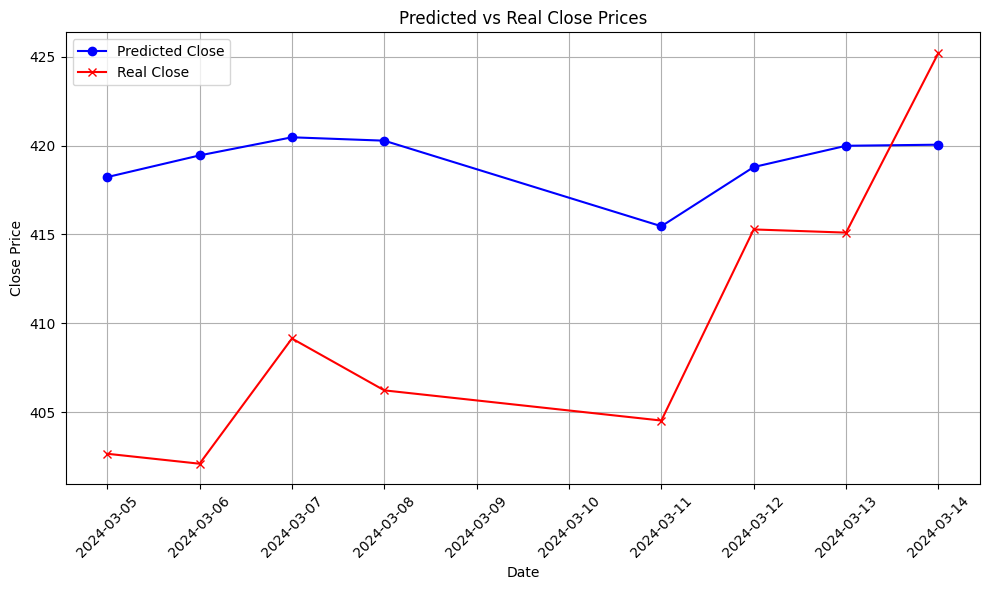

In [442]:
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], predictions_df['Predicted_Close'], marker='o', linestyle='-', color='b', label='Predicted Close')
plt.plot(predictions_df['Date'], predictions_df['Close'], marker='x', linestyle='-', color='r', label='Real Close')
plt.title('Predicted vs Real Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [445]:
#calculate the error
predictions_df['error'] = predictions_df['Predicted_Close'] - predictions_df['Close']

#find the r2 score
from sklearn.metrics import r2_score
r2_score(predictions_df['Close'], predictions_df['Predicted_Close'])



-1.3534991907509029